# Decision Tree Classifier

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [93]:
df = pd.read_csv(r"C:\Users\OM\program by om unde\Machine Learning Practice\Datasets\salaries.csv")

In [94]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [95]:
df.shape

(16, 4)

In [96]:
#we will divide datset into target variable and independent variable
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [97]:
# So now we will divide the dataset into target variable and test variable
inputs = df.drop('salary_more_then_100k',axis=1)
target = df['salary_more_then_100k']

In [98]:
target.head(17)

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [99]:
# Now we will convert the categorical data of attributes into binary representation 0 and 1
from sklearn.preprocessing import LabelEncoder

In [100]:
# Now we will create 3 different columns as we have 3 different objects
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder() 

In [101]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [102]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


# Now we will create tree

In [103]:
# get tree from sklearn
from sklearn import tree

In [104]:
# Initialize with model to be trained 
model = tree.DecisionTreeClassifier()

In [105]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [106]:
model.score(inputs_n,target)

1.0

In [107]:
# We have taken this number 2,2,1 from label encoded columns
model.predict([[2,2,1]])

c:\Users\OM\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [108]:
entropy_clf = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=0)

entropy_clf.fit(inputs_n, target)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

[Text(0.4, 0.9, 'x[0] <= 0.5\nentropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2, 0.7, 'x[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3, 0.5, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.7, 'x[0] <= 1.5\nentropy = 0.811\nsamples = 12\nvalue = [3, 9]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.3, 'x[1] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.7, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

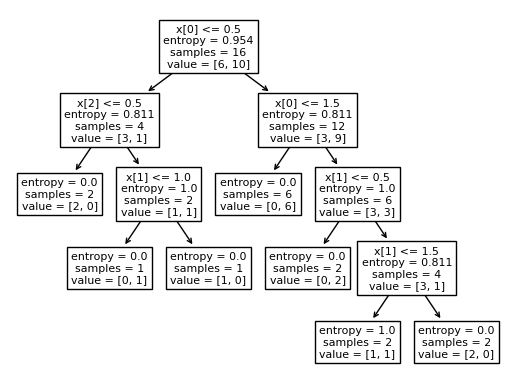

In [109]:
tree.plot_tree(entropy_clf.fit(inputs_n, target)) 